In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [160]:
dCV.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Georgia', 'Germany', 'Gibraltar', 'Greece',
       'Guernsey', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Martinique'

In [8]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    return gb_datadict

def add_days(df_dict):
    days = []
    for key in df_dict.keys():
        df_dict[key]['day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]   
        df_dict[key]['reverse_day'] = list(-1 *np.array(sorted([ i for i in range(1, df_dict[key].shape[0]+1)], reverse = True)))
    return df_dict

def add_log(df_dict, column):
    days = []
    for key in df_dict.keys():
        df_dict[key]['log_'+ str(column)] = np.log(abs(df_dict[key][column]))
    return df_dict


In [9]:
dCV_loc_dict = groupby_column(dCV, 'location')
print(dCV_loc_dict['Italy'].shape[0])
dCV_country = add_days(dCV_loc_dict)  
dCV_country['India'].head()

42


/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day
754,2020-01-30,India,0.0,0.0,1,0.0,1,-43
755,2020-01-31,India,0.0,0.0,1,0.0,2,-42
756,2020-02-01,India,0.0,0.0,1,0.0,3,-41
757,2020-02-02,India,1.0,0.0,2,0.0,4,-40
758,2020-02-03,India,1.0,0.0,3,0.0,5,-39


In [73]:
dCV_country['Spain']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
1688,2020-02-01,Spain,0.0,0.0,1,0.0,1,-41,0.000000,0.000000
1689,2020-02-02,Spain,0.0,0.0,1,0.0,2,-40,0.000000,0.693147
1690,2020-02-03,Spain,0.0,0.0,1,0.0,3,-39,0.000000,1.098612
1691,2020-02-04,Spain,0.0,0.0,1,0.0,4,-38,0.000000,1.386294
1692,2020-02-05,Spain,0.0,0.0,1,0.0,5,-37,0.000000,1.609438
1693,2020-02-06,Spain,0.0,0.0,1,0.0,6,-36,0.000000,1.791759
1694,2020-02-07,Spain,0.0,0.0,1,0.0,7,-35,0.000000,1.945910
1695,2020-02-08,Spain,0.0,0.0,1,0.0,8,-34,0.000000,2.079442
1696,2020-02-09,Spain,0.0,0.0,1,0.0,9,-33,0.000000,2.197225
1697,2020-02-10,Spain,1.0,0.0,2,0.0,10,-32,0.693147,2.302585


In [10]:
dCV_country = add_log(dCV_country, 'total_cases')
dCV_country = add_log(dCV_country, 'day')
dCV_country['India'].head()

/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
754,2020-01-30,India,0.0,0.0,1,0.0,1,-43,0.000000,0.000000
755,2020-01-31,India,0.0,0.0,1,0.0,2,-42,0.000000,0.693147
756,2020-02-01,India,0.0,0.0,1,0.0,3,-41,0.000000,1.098612
757,2020-02-02,India,1.0,0.0,2,0.0,4,-40,0.693147,1.386294
758,2020-02-03,India,1.0,0.0,3,0.0,5,-39,1.098612,1.609438


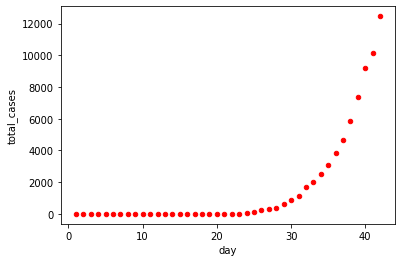

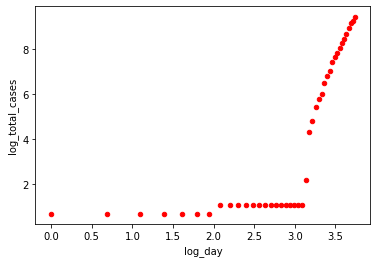

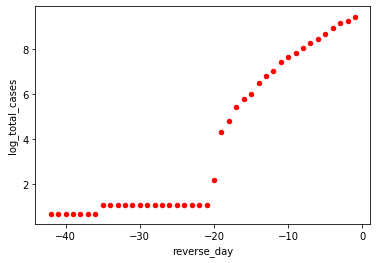

In [12]:
dCV_country['Italy'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

In [71]:
def get_data_from_ndays(df_dict, ndays = 30):
    df_subdict = {}
    for key in df_dict.keys():
        df_subdict[key] = df_dict[key].loc[df_dict[key]['day']>=ndays]
    return df_subdict
dCVsub_country = get_data_from_ndays(dCV_country)
dCVsub_country['Iran']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day


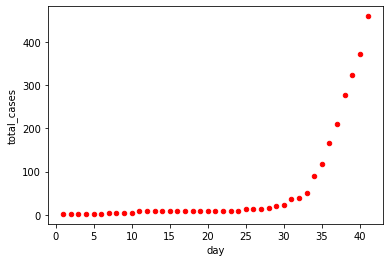

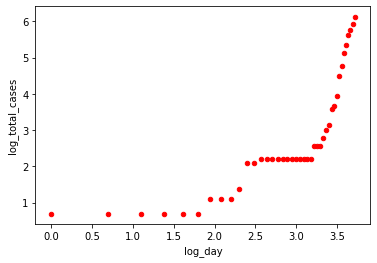

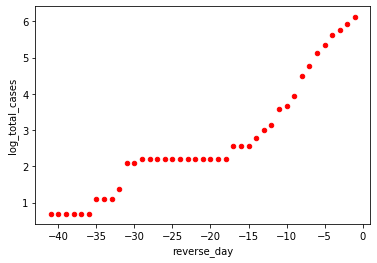

In [38]:
dCV_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

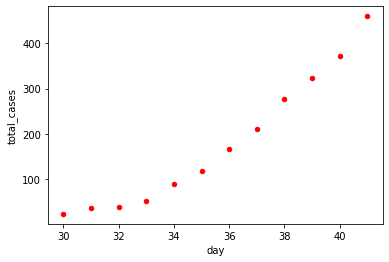

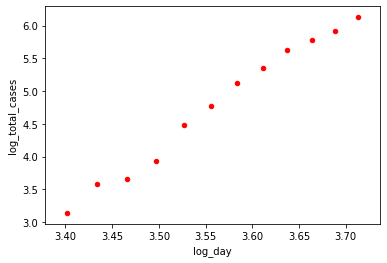

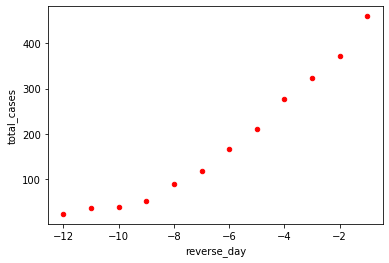

In [40]:
dCVsub_country['United Kingdom'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCVsub_country['United Kingdom'].plot(kind='scatter',x='reverse_day',y='total_cases',color='red')
plt.show()

[30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
[[30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]]
[[  44.56005931]
 [  63.14797931]
 [  89.48972135]
 [ 126.81973856]
 [ 179.72171381]
 [ 254.69138149]
 [ 360.9341266 ]
 [ 511.49529671]
 [ 724.86201574]
 [1027.23318325]
 [1455.73638827]
 [2062.98673628]
 [2923.54735952]
 [4143.08488418]
 [5871.34403746]
 [8320.53452195]]


/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


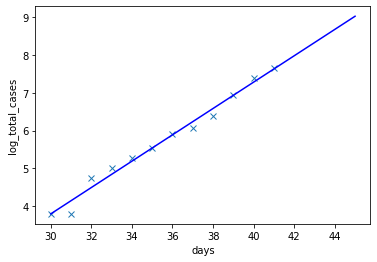

array([[0.34864292]])

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
s = 'Spain'
x = np.array(dCVsub_country[s]['day']).reshape(-1,1)
y = np.array(dCVsub_country[s]['log_total_cases']).reshape(-1,1)
model.fit(x, y)
x_new = np.linspace(30,45,16)
print(x_new)
print(x)
y_new = model.predict(x_new.reshape(-1,1))
print(np.exp(y_new.reshape(-1,1)))
# plot the results
plt.plot(x, y, 'x', x_new, y_new, 'b')
ax= plt.axes()
ax.set_xlabel('days')
ax.set_ylabel('log_total_cases')
plt.show()
model.coef_


In [205]:
from scipy import optimize

def piecewise_linear(x, x0, x1,x2, b1, b2, k0,k1, k2):
    condlist = [x < x0, (x >= x0) & (x < x1), (x >= x1) & (x < x2), (x >= x2)]
    funclist = [lambda x: b1, 
#                 lambda x: b1 + k0*(x-x0),
                lambda x: b1+ k0*(x-x0)+ k1*(x-x1),
#                 lambda x: b1 + b2 + k1*(x-x1),
                lambda x: b2,
#                 lambda x: b1 + b2 + k1*(x-x1) + k2*(x-x2)
                lambda x: b2+k2*(x-x2)
               ]
    return np.piecewise(x, condlist, funclist)

s = 'India'
x  = np.array(dCV_country[s]['log_day'])
y  = np.array(dCV_country[s]['log_total_cases'])
p, e = optimize.curve_fit(piecewise_linear, x, y)
p,e

/home/rk19abb/anaconda3/envs/enose/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([1.00000000e+00, 1.00000000e+00, 3.45608440e+00, 1.79570459e-15,
        1.04674755e+00, 1.00000000e+00, 1.00000000e+00, 1.15336747e+01]),
 array([[inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf]]))

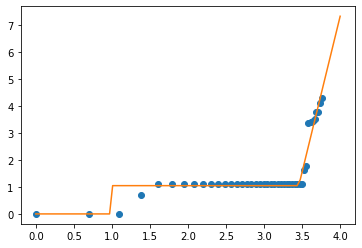

In [206]:
xd = np.linspace(0, 4, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

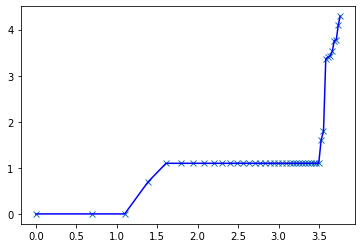

In [207]:
from scipy import interpolate
tck = interpolate.splrep(x, y, s=0)
ynew = interpolate.splev(x, tck, der=0)

plt.plot(x, y, 'x', x, ynew, 'b')

In [213]:
F = interpolate.PPoly.from_spline(tck)
F.x, F.c

(array([0.        , 0.        , 0.        , 0.        , 1.09861229,
        1.38629436, 1.60943791, 1.79175947, 1.94591015, 2.07944154,
        2.19722458, 2.30258509, 2.39789527, 2.48490665, 2.56494936,
        2.63905733, 2.7080502 , 2.77258872, 2.83321334, 2.89037176,
        2.94443898, 2.99573227, 3.04452244, 3.09104245, 3.13549422,
        3.17805383, 3.21887582, 3.25809654, 3.29583687, 3.33220451,
        3.36729583, 3.40119738, 3.4339872 , 3.4657359 , 3.49650756,
        3.52636052, 3.55534806, 3.58351894, 3.61091791, 3.63758616,
        3.66356165, 3.68887945, 3.71357207, 3.76120012, 3.76120012,
        3.76120012, 3.76120012]),
 array([[ 3.51439570e+00,  3.51439570e+00,  3.51439570e+00,
          3.51439570e+00, -8.17690173e+00, -7.31740211e+00,
          1.57299203e+01, -5.38198756e+00,  1.77902394e+00,
         -5.73015240e-01,  1.80875147e-01, -5.61772549e-02,
          1.72178511e-02, -5.21898771e-03,  1.56714363e-03,
         -4.66676910e-04,  1.37486961e-04, -3.81400474

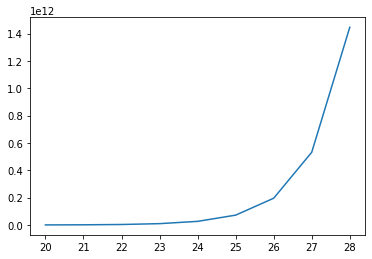

In [186]:
## model the rate of growth
from scipy.stats import powerlaw
import math
x  = range(20,29)
y = np.array(np.exp(x))
plt.plot(x,y)